5.Data Analytics II

1.Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.

2.Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# Drop unnecessary column if present
if 'User ID' in df.columns:
    df.drop(columns=['User ID'], inplace=True)

In [4]:
# Encode 'Gender' to numerical
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [5]:
# Check and handle missing values
df.dropna(inplace=True)  # You can also use df.fillna(df.mean(numeric_only=True), inplace=True)


In [16]:
# Display dataset info
print("\nDataset Head:\n", df.head())


Dataset Head:
    Gender   Age  EstimatedSalary  Purchased
0       0  19.0          19000.0          0
1       0  35.0          20000.0          0
2       1  26.0          43000.0          0
3       1  27.0          57000.0          0
4       0  19.0          76000.0          0


In [17]:
# Split into features and target
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Predictions
y_pred = model.predict(X_test)

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

In [23]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


In [24]:
# Display results
print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[61  2]
 [10 27]]

True Positives (TP): 27
False Positives (FP): 2
True Negatives (TN): 61
False Negatives (FN): 10

Accuracy: 0.88
Error Rate: 0.12
Precision: 0.93
Recall: 0.73


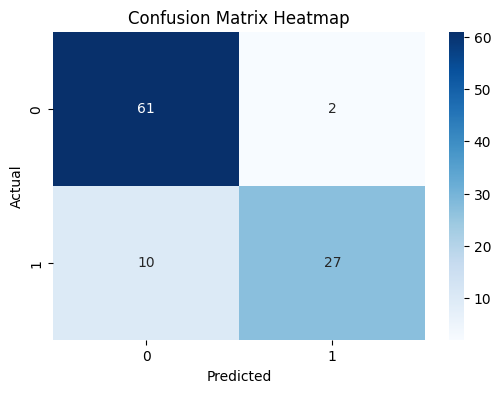

In [25]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

 Theory:
📌 What is Logistic Regression?
Logistic Regression is a supervised machine learning algorithm used for binary classification problems. Unlike linear regression, it predicts probabilities using the sigmoid function, and the output is transformed into a binary class (0 or 1).
The sigmoid function is:
𝑃(𝑦=1∣𝑥)=11+𝑒−(𝛽0+𝛽1𝑥1+𝛽2𝑥2+⋯+𝛽𝑛𝑥𝑛)
P(y=1∣x)=1/1+e−(β0​+β1​x1​+β2​x2​+⋯+βn​xn​)1​
If the predicted probability > 0.5, class is labeled as 1 (positive class); otherwise, it is 0.
📊 Dataset Overview:
Dataset Used: Social_Network_Ads.csv
Features: Gender, Age, Estimated Salary
Target Variable: Purchased (1 = Yes, 0 = No)
The goal is to predict whether a person will purchase a product based on their profile.
🧪 Steps Performed:
1. Data Preprocessing:
Dropped unnecessary columns like User ID
Converted categorical feature 'Gender' into numeric (Male = 0, Female = 1)
Removed or handled any missing values
Split the data into:
X: Features (Gender, Age, Estimated Salary)
y: Target (Purchased)
Used train_test_split() to divide the dataset (75% train, 25% test)
Applied StandardScaler to normalize feature values
2. Model Training:
Trained a LogisticRegression model using training data
Made predictions on test data using .predict()
3. Model Evaluation – Confusion Matrix:
A Confusion Matrix helps visualize classification performance using four metrics:
TP (True Positives): Correctly predicted positives
TN (True Negatives): Correctly predicted negatives
FP (False Positives): Incorrectly predicted positives
FN (False Negatives): Incorrectly predicted negatives
From this matrix, the following metrics are calculated:
Accuracy: 𝑇𝑃+𝑇𝑁/𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁
Error Rate: 1−Accuracy
Precision: 𝑇𝑃/𝑇𝑃+𝐹𝑃
Recall (Sensitivity): 𝑇𝑃/𝑇𝑃+𝐹𝑁
4. Visualization:
A heatmap of the confusion matrix is plotted using seaborn for better interpretation of model performance.
✅ Conclusion:
The Logistic Regression model was successfully implemented on the Social Network Ads dataset. It helped classify user purchase behavior based on age, salary, and gender. The model was evaluated using a confusion matrix and various performance metrics. This experiment demonstrates the practical use of classification algorithms in real-world marketing and targeting applications.